In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('banksim.csv')
data.head()

,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.71,0
1,426989,4,F,es_health,39.29,0
2,310539,3,F,es_transportation,18.76,0
3,215216,4,M,es_transportation,13.95,0
4,569244,2,M,es_transportation,49.87,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 6 columns):
Unnamed: 0    7200 non-null int64
age           7200 non-null object
gender        7200 non-null object
category      7200 non-null object
amount        7200 non-null float64
fraud         7200 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 337.6+ KB


In [4]:
data.groupby('age').mean()

,Unnamed: 0,amount,fraud
age,,,
0,327520.450000,49.468935,0.050000
1,290985.509116,35.622829,0.026648
2,296867.958851,37.228665,0.028718
3,291471.417346,37.279338,0.023283
4,306041.396403,36.197985,0.035966
5,290885.960859,37.547521,0.023990
6,299193.716561,36.700852,0.022293
U,288372.181818,39.117000,0.000000


In [5]:
data.groupby('fraud').mean()

,Unnamed: 0,amount
fraud,,
0,296901.424143,32.662954
1,272659.540000,188.133751


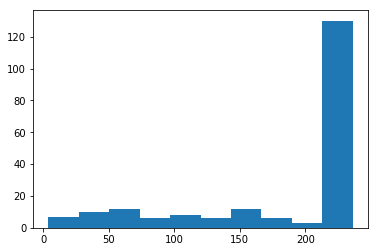

In [6]:
fraud = data.loc[data.fraud==1]
non_fraud = data.loc[data.fraud==0]
plt.hist(fraud.amount)
plt.show()

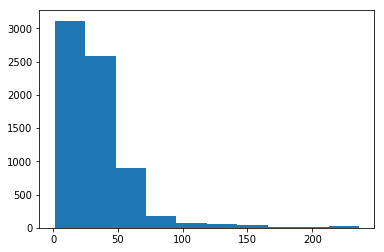

In [7]:
plt.hist(non_fraud.amount)
plt.show()

In [8]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1].values

In [9]:
X_dummies = pd.get_dummies(X, drop_first=True)
X_dummies = np.array(X_dummies)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X_dummies)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

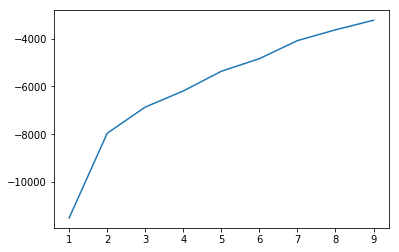

In [12]:
from sklearn.cluster import MiniBatchKMeans
score = []
for i in range(1,10):
    kmeans = MiniBatchKMeans(n_clusters=i)
    kmeans.fit(X_train)
    score.append(kmeans.score(X_scaled))
    
plt.plot(range(1,10), score)
plt.show()

In [13]:
print(kmeans.score(X_scaled))

-3225.755415915596


In [28]:
kmeans = MiniBatchKMeans(n_clusters=2)
kmeans.fit(X_scaled)
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_

In [29]:
X_test_clusters_centers

array([[1.49747216e-01, 1.01896405e-01, 3.02858760e-01, 2.45683555e-01,
        1.90772714e-01, 1.07840362e-01, 4.38720634e-02, 3.39654684e-03,
        9.34050382e-03, 9.86696858e-01, 5.66091141e-04, 5.66091141e-04,
        1.38692329e-02, 3.84941976e-02, 3.02858760e-02, 1.41522785e-03,
        6.22700255e-03, 8.20832154e-03, 2.54741013e-03, 3.39654684e-03,
        9.62354939e-03, 5.37786584e-03, 8.39796207e-01, 1.98131899e-03,
        2.46249646e-02],
       [1.60323751e-01, 9.42113897e-02, 3.37004921e-01, 2.30372627e-01,
        1.78579798e-01, 1.09210218e-01, 4.12467776e-02, 0.00000000e+00,
        9.95547223e-01, 3.98406375e-03, 4.68713382e-04, 1.17178345e-03,
        1.31239747e-02, 3.93719241e-02, 4.54651980e-02, 3.51535036e-03,
        2.57792360e-03, 1.24209046e-02, 1.64049684e-03, 9.37426764e-04,
        1.17178345e-02, 6.09327396e-03, 8.14389501e-01, 2.81228029e-03,
        3.23412233e-02]])

In [30]:
X_test_clusters

array([0, 0, 1, ..., 1, 0, 1])

In [31]:
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

In [42]:
y_pred = np.array(dist)
y_pred[dist >= np.percentile(dist, 98)] = 1
y_pred[dist < np.percentile(dist, 98)] = 0

In [43]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cm

array([[1395,    6],
       [  16,   23]], dtype=int64)

In [45]:
acc

0.9847222222222223